In [67]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [68]:
game_csv = pd.read_csv('./data/Training_dataset_Original.csv',na_values=["NA", "na", "missing"])
gameDf = pd.DataFrame(game_csv)

dataDict = pd.read_csv('./data/Data_Dictionary.csv',na_values="NA")

#Leaderboard
leader_csv = pd.read_csv('./data/Leaderboard_dataset.csv',na_values=["NA", "na", "missing"])
leaderDf = pd.DataFrame(leader_csv)



In [69]:
print(gameDf.shape)
print(dataDict.shape)

(80000, 49)
(49, 2)


In [70]:
dic = dict(zip(dataDict.values[:, 1], dataDict.values[:, 0]))

In [71]:
dic['Average tenure of active revolving credit cards (in days)']

'mvar25'

In [72]:
#remove ID column
del gameDf[dic['Application ID (primary key)']]
del dic['Application ID (primary key)']

leaderAppID = leaderDf['application_key']
del leaderDf['application_key']
leaderX = leaderDf.copy()

In [73]:
gameX = gameDf.iloc[:,:-1]
gameY = gameDf.iloc[:,-1]

In [74]:
range(gameDf["mvar47"].shape[0])

range(0, 80000)

In [75]:
gameX["mvar47"][0]

'C'

In [76]:
#one hot encoding C=0 L=1
gameX['mvar47'] = pd.get_dummies(gameX['mvar47'])

leaderX['mvar47'] = pd.get_dummies(leaderX['mvar47'])

In [77]:
gameX["mvar47"].dtype

dtype('uint8')

In [78]:
#Missing values median
gameX.fillna(gameX.median(),inplace = True)
leaderX.fillna(gameX.median(),inplace = True)

# gameX.fillna(0,inplace = True)
# leaderX.fillna(0,inplace = True)

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47
0,1753.0,0.5001,0.000,0.0000,0.000,206.0,19179.0,206.0,14221.0,19438.0,...,1.0,0.0,100.000,20.5510,0.42105,3.0,0.85661,0.0,0.0,0
1,1894.0,1.9701,0.000,0.0000,0.000,297.0,19820.0,19820.0,176895.0,66346.0,...,3.0,0.0,100.000,63.0470,0.00000,15.0,0.94391,0.0,0.0,1
2,1774.0,0.1718,0.000,0.0000,0.000,197.0,2563.0,877.0,8869.0,3637.0,...,1.0,0.0,100.000,83.7970,0.33333,3.0,0.76467,0.0,0.0,1
3,1586.0,0.1123,5.299,0.0000,0.000,297.0,6967.0,2478.0,14171.0,0.0,...,1.0,0.0,100.000,78.8835,1.50000,0.0,0.73703,0.0,0.0,1
4,1832.0,1.4442,0.000,0.0000,0.000,179.0,7577.0,179.0,21059.0,20306.0,...,3.0,0.0,96.052,66.6650,0.00000,23.0,0.79190,0.0,0.0,0
5,1838.0,0.0544,0.241,0.0000,0.000,882.0,14039.0,10976.0,278941.0,74030.0,...,4.0,0.0,100.000,77.7800,0.00000,21.0,0.92462,0.0,0.0,0
6,1743.0,1.0753,0.272,0.0000,0.000,397.0,16141.0,3568.0,69482.0,56755.0,...,6.0,0.0,100.000,67.1590,0.00000,14.0,0.71347,0.0,0.0,0
7,1935.0,0.5601,0.000,0.0000,0.000,496.0,44919.0,17115.0,124814.0,124167.0,...,9.0,0.0,100.000,78.8835,0.00000,15.0,0.92403,0.0,0.0,0
8,1885.0,0.0811,0.000,0.0000,0.000,7369.0,19264.0,19264.0,59956.0,26633.0,...,1.0,0.0,100.000,78.8835,0.00000,5.0,0.89760,0.0,0.0,0
9,1730.0,0.7444,0.000,0.0000,0.000,0.0,2103.0,582.0,16429.0,9197.0,...,9.0,0.0,100.000,78.8835,0.05882,14.0,0.40529,0.0,0.0,1


In [79]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1, solver='lbfgs', multi_class='multinomial').fit(gameX, gameY)

In [14]:
clf.coef_

array([[ -5.39622128e-06,   2.40743789e-08,   8.03220653e-08,
          1.42849020e-08,   1.87349845e-08,  -1.05734377e-05,
          1.40181589e-05,  -1.97309022e-05,   1.20678041e-06,
         -1.47185084e-05,   8.29479510e-08,   1.33978734e-05,
         -7.50769131e-06,   7.64747234e-10,  -4.97140393e-07,
          8.40845705e-09,   1.00775820e-08,   1.03107149e-08,
          1.46132998e-08,   1.50542490e-08,   2.02182871e-07,
          2.54408245e-05,   1.87812090e-05,   3.03491634e-07,
         -1.27398731e-05,  -1.94874040e-05,  -1.68634042e-05,
         -1.36233071e-05,  -3.53727888e-05,  -1.23452964e-05,
         -1.28837310e-05,  -2.70443049e-06,  -5.09307275e-08,
          7.67246612e-09,   5.17223759e-09,   5.10071545e-08,
         -3.45608283e-08,   3.76372726e-08,   4.25064109e-09,
         -1.63620249e-07,  -1.33590599e-07,   4.17905402e-09,
         -3.26389086e-08,  -2.72216564e-09,   7.91106761e-10,
          2.66592399e-09,   6.85266216e-09]])

In [100]:
clf.coef_.shape

(1, 47)

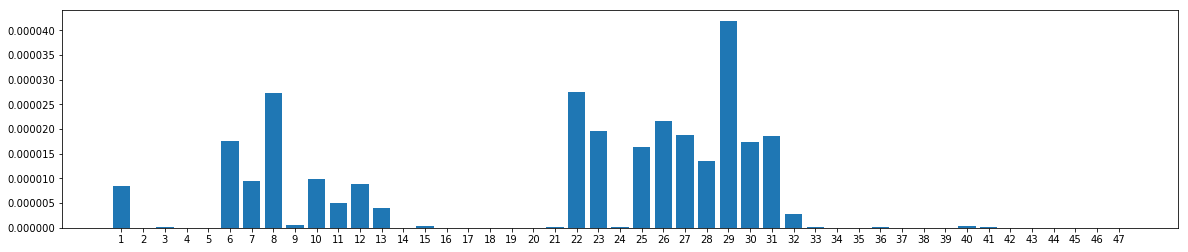

In [25]:
#LR feature imp
lr_coef = clf.coef_.reshape(-1, 1)
plt.figure(figsize=(20, 4))
plt.bar(range(1, len(lr_coef)+1), np.abs(lr_coef) )
plt.xticks(range(1, len(lr_coef)+1))
plt.show()

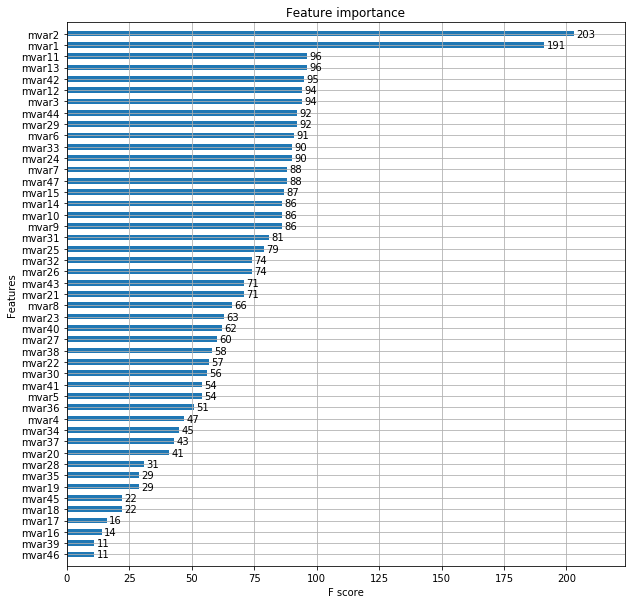

In [85]:
#xgb feature imp
from xgboost import plot_importance
ax = plot_importance(bst, height=0.5)
fig = ax.figure
fig.set_size_inches(10,10)
plt.show()

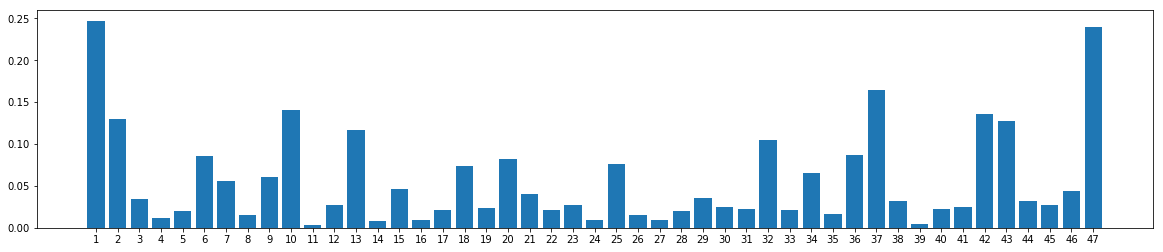

In [57]:
#LR feature imp
lr_coef = clf.coef_.reshape(-1, 1)
plt.figure(figsize=(20, 4))
plt.bar(range(1, len(lr_coef)+1), np.abs(lr_coef) )
plt.xticks(range(1, len(lr_coef)+1))
plt.show()

In [16]:
pred = clf.predict_proba(leaderX) 

In [ ]:
#828000

In [76]:
s = prep.StandardScaler().fit(sss)

In [75]:
sss = gameX.copy()

In [80]:
ss = s.transform(sss)

In [85]:
pd.DataFrame(ss).describe()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
count,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,...,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04
mean,3.830221e-16,2.935170e-15,2.852924e-15,1.191352e-14,9.573706e-15,1.112517e-15,-4.842869e-16,9.902794e-16,-3.510969e-16,-7.927728e-16,...,7.733139e-16,8.131302e-15,-7.152401e-15,-6.209071e-16,-3.155659e-15,8.662626e-16,1.147186e-15,2.220023e-15,1.259845e-14,4.383291e-15
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,...,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-2.736848e+00,-6.690739e-01,-4.866012e-01,-2.632847e-01,-1.869878e-01,-3.948810e-01,-3.695296e-01,-6.371610e-01,-6.262059e-01,-4.532321e-01,...,-1.082226e+00,-2.078937e-01,-7.164080e+00,-5.427811e+00,-8.929242e-01,-1.040801e+00,-2.769594e+00,-1.604506e-01,-2.323531e-01,-1.356801e+00
25%,-6.798037e-01,-5.686148e-01,-4.866012e-01,-2.632847e-01,-1.869878e-01,-3.674637e-01,-3.231089e-01,-5.461601e-01,-5.319021e-01,-4.358705e-01,...,-5.763180e-01,-2.078937e-01,2.355083e-02,1.525662e-01,-8.929242e-01,-7.223625e-01,-7.351857e-01,-1.604506e-01,-2.323531e-01,-1.356801e+00
50%,-4.103748e-02,-3.309262e-01,-4.587941e-01,-2.632847e-01,-1.869878e-01,-3.044040e-01,-2.145639e-01,-3.628297e-01,-3.422929e-01,-3.115252e-01,...,-3.233639e-01,-2.078937e-01,2.355083e-02,1.525662e-01,-3.549055e-01,-2.447043e-01,1.226015e-01,-1.604506e-01,-2.323531e-01,7.370277e-01
75%,6.518615e-01,1.832918e-01,1.041131e-01,-2.632847e-01,-1.869878e-01,-1.548276e-01,-6.209970e-03,4.645321e-02,1.010870e-01,5.087053e-02,...,4.354985e-01,-2.078937e-01,2.355083e-02,1.525662e-01,6.015843e-01,5.513927e-01,9.260936e-01,-1.604506e-01,-2.323531e-01,7.370277e-01
max,2.210884e+00,2.733532e+01,2.610231e+01,6.377666e+01,3.771109e+01,4.121691e+01,1.230692e+02,3.166818e+01,7.374052e+01,8.364267e+01,...,2.294841e+01,5.178875e+01,2.376762e+01,6.598331e+00,4.487263e+00,1.344816e+01,1.247076e+00,2.565622e+01,6.398160e+01,7.370277e-01


In [69]:
gameX_scaled.describe()

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,mvar38,mvar39,mvar40,mvar41,mvar42,mvar43,mvar44,mvar45,mvar46,mvar47
count,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,...,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04
mean,3.830221e-16,2.935170e-15,2.852924e-15,1.191352e-14,9.573706e-15,1.112517e-15,-4.842869e-16,9.902794e-16,-3.510969e-16,-7.927728e-16,...,7.733139e-16,8.131302e-15,-7.152401e-15,-6.209071e-16,-3.155659e-15,8.662626e-16,1.147186e-15,2.220023e-15,1.259845e-14,4.383291e-15
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,...,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-2.736848e+00,-6.690739e-01,-4.866012e-01,-2.632847e-01,-1.869878e-01,-3.948810e-01,-3.695296e-01,-6.371610e-01,-6.262059e-01,-4.532321e-01,...,-1.082226e+00,-2.078937e-01,-7.164080e+00,-5.427811e+00,-8.929242e-01,-1.040801e+00,-2.769594e+00,-1.604506e-01,-2.323531e-01,-1.356801e+00
25%,-6.798037e-01,-5.686148e-01,-4.866012e-01,-2.632847e-01,-1.869878e-01,-3.674637e-01,-3.231089e-01,-5.461601e-01,-5.319021e-01,-4.358705e-01,...,-5.763180e-01,-2.078937e-01,2.355083e-02,1.525662e-01,-8.929242e-01,-7.223625e-01,-7.351857e-01,-1.604506e-01,-2.323531e-01,-1.356801e+00
50%,-4.103748e-02,-3.309262e-01,-4.587941e-01,-2.632847e-01,-1.869878e-01,-3.044040e-01,-2.145639e-01,-3.628297e-01,-3.422929e-01,-3.115252e-01,...,-3.233639e-01,-2.078937e-01,2.355083e-02,1.525662e-01,-3.549055e-01,-2.447043e-01,1.226015e-01,-1.604506e-01,-2.323531e-01,7.370277e-01
75%,6.518615e-01,1.832918e-01,1.041131e-01,-2.632847e-01,-1.869878e-01,-1.548276e-01,-6.209970e-03,4.645321e-02,1.010870e-01,5.087053e-02,...,4.354985e-01,-2.078937e-01,2.355083e-02,1.525662e-01,6.015843e-01,5.513927e-01,9.260936e-01,-1.604506e-01,-2.323531e-01,7.370277e-01
max,2.210884e+00,2.733532e+01,2.610231e+01,6.377666e+01,3.771109e+01,4.121691e+01,1.230692e+02,3.166818e+01,7.374052e+01,8.364267e+01,...,2.294841e+01,5.178875e+01,2.376762e+01,6.598331e+00,4.487263e+00,1.344816e+01,1.247076e+00,2.565622e+01,6.398160e+01,7.370277e-01


In [80]:
#Standadisation

In [81]:
from sklearn import preprocessing as prep

scaler_list = []
for i in gameX.columns:
    scaler_list.append(prep.StandardScaler().fit(gameX[i]))
    
# prep.StandardScaler()

/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a s

In [82]:
gameX_scaled = gameX.copy()

for i in enumerate(gameX_scaled.columns):
    gameX_scaled[i[1]] = scaler_list[i[0]].transform(gameX_scaled[i[1]])

/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a s

In [83]:
leaderX_scaled = leaderX.copy()

for i in enumerate(leaderX_scaled.columns):
    leaderX_scaled[i[1]] = scaler_list[i[0]].transform(leaderX_scaled[i[1]])

/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a s

In [84]:
#Training

In [85]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1, solver='lbfgs', multi_class='multinomial').fit(gameX_scaled, gameY)

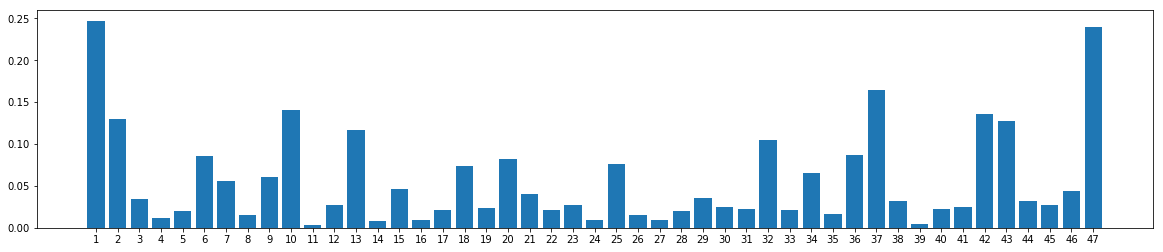

In [86]:
#LR feature imp
lr_coef = clf.coef_.reshape(-1, 1)
plt.figure(figsize=(20, 4))
plt.bar(range(1, len(lr_coef)+1), np.abs(lr_coef) )
plt.xticks(range(1, len(lr_coef)+1))
plt.show()

In [87]:
pred = clf.predict_proba(leaderX_scaled)

In [88]:
pred = pd.DataFrame(pred)
pred['application_key'] = leaderAppID
pred.shape

(25000, 3)

In [89]:
pred

,0,1,application_key
0,0.824439,0.175561,350053
1,0.828534,0.171466,350054
2,0.701109,0.298891,350055
3,0.427711,0.572289,350056
4,0.809484,0.190516,350057
5,0.885874,0.114126,350058
6,0.809703,0.190297,350059
7,0.918935,0.081065,350060
8,0.900089,0.099911,350061
9,0.630194,0.369806,350062


In [90]:
pred = pred.sort_values(by = 0,kind = 'mergesort',ascending = False) #true for xgb method3

In [91]:
cols = pred.columns.tolist()
cols = cols[-1:] + cols[:-1]
pred = pred[cols]

In [92]:
pred = pred.loc[:,'application_key':]

In [93]:
submit = pred['application_key'][:10000]
submit = pd.DataFrame(submit)
submit[0] = 0

In [94]:
# submit.iloc[-400:, 1] = 1

In [95]:
submit

,application_key,0
21128,371181,0
15911,365964,0
23338,373391,0
13848,363901,0
7820,357873,0
3642,353695,0
11401,361454,0
22990,373043,0
8558,358611,0
21040,371093,0


In [96]:
submit.to_csv('flabbergasted_IITGuwahati_207.csv',header = False, index = False)